# Dataset Exploration
In this notebook, we explore the MOSAD time series.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../")

from tqdm import tqdm
from itertools import product

In [3]:
from src.utils import load_mosad_dataset
from src.visualizer import plot_ts

Let's load and list the datasets.

In [4]:
df_ts = load_mosad_dataset()
df_ts

,dataset,routine,subject,sensor,sample_rate,change_points,activities,time_series
0,Routine1_Subject1_X-Acc,1,1,X-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.1986, -0.454326, -0.5473, -0.496056, -0.48..."
1,Routine1_Subject1_X-Gyro,1,1,X-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0174, 0.0358, 0.0431, 0.0358, 0.0168, 0.008..."
2,Routine1_Subject1_X-Mag,1,1,X-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-31.02, -30.84, -30.65, -30.58, -31.52, -30.7..."
3,Routine1_Subject1_Y-Acc,1,1,Y-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0161, -0.100877, -0.1434, -0.13972, -0.081..."
4,Routine1_Subject1_Y-Gyro,1,1,Y-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0525, -0.0568, -0.0482, -0.0012, 0.0153, 0..."
5,Routine1_Subject1_Y-Mag,1,1,Y-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-127.26, -127.41, -127.86, -127.23, -127.27, ..."
6,Routine1_Subject1_Z-Acc,1,1,Z-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0865, 0.106412, 0.0107, -0.143706, -0.2007,..."
7,Routine1_Subject1_Z-Gyro,1,1,Z-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0509, 0.0851, 0.1157, 0.1291, 0.1193, 0.114..."
8,Routine1_Subject1_Z-Mag,1,1,Z-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-78.8, -78.16, -78.93, -79.72, -79.14, -78.78..."
9,Routine1_Subject2_X-Acc,1,2,X-Acc,50,"[928, 1652, 10952, 14086, 20136, 29236, 32502,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0098, 0.0536, 0.1473, 0.1691, -0.0239, -0...."


Let's visualize by time series length, activity length and amount of change points.

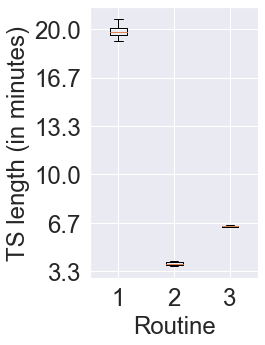

In [105]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(3,5))

df_len = pd.DataFrame()
df_len["routine"] = df_ts.routine
df_len["tslen"] = df_ts.time_series.apply(len)

groups = [df_len[df_len.routine == idx].tslen for idx in range(1, 3+1)]

ax.boxplot(groups)

ax.set_xlabel("Routine", fontsize=fontsize)
ax.set_ylabel("TS length (in minutes)", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_yticks(np.arange(10_000, 60_000+1, 10_000))
ax.set_yticklabels(labels=[f"{round((x / 50) / 60, 1)}" for x in np.arange(10_000, 60_000+1, 10_000)])

plt.savefig(f"../figures/ts_length.pdf", bbox_inches="tight") 

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2489/2682236030.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  activities, alens = np.array(list(activity_lengths.keys())), np.array(list(activity_lengths.values()))


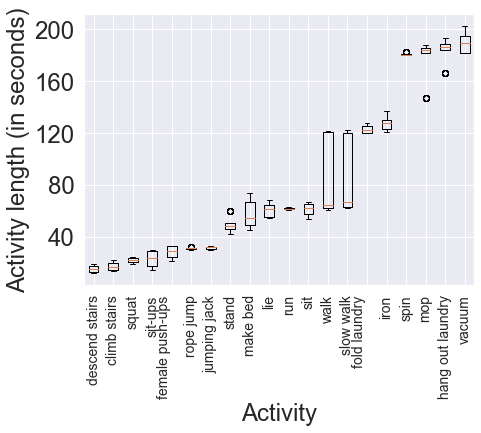

In [106]:
fontsize = 24

activity_lengths = dict()

for _, row in df_ts.iterrows():
    cps = [0] + row.change_points.tolist() + [row.time_series.shape[0]]
    alens = np.diff(cps)
    
    for a, alen in zip(row.activities, alens):
        if a not in activity_lengths:
            activity_lengths[a] = list()
            
        activity_lengths[a].append(alen)
        
activities, alens = np.array(list(activity_lengths.keys())), np.array(list(activity_lengths.values()))
idxsort = np.argsort([np.median(x) for x in alens])

_, ax = plt.subplots(1, figsize=(7,5))
# ax.scatter(np.arange(len(activity_lengths)), np.sort(activity_lengths))
ax.boxplot(alens[idxsort])

ax.set_xlabel("Activity", fontsize=fontsize)
ax.set_ylabel("Activity length (in seconds)", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(activities[idxsort], rotation=90, fontsize=14)

ax.set_yticks(np.arange(2_000, 10_000+1, 2_000))
ax.set_yticklabels(labels=[f"{int(x/50)}" for x in np.arange(2_000, 10_000+1, 2_000)])
    
plt.savefig(f"../figures/activity_length.pdf", bbox_inches="tight") 

{2: 36, 5: 36, 12: 54}


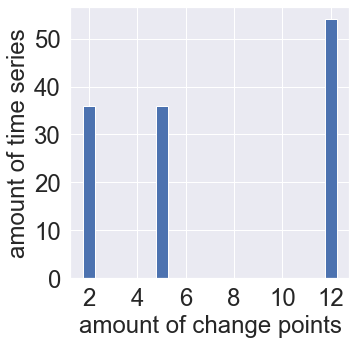

In [67]:
fontsize = 24

change_points, counts = np.unique(df_ts["change_points"].apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(5,5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
print(dict(zip(change_points, counts)))

ax.set_xlabel("amount of change points", fontsize=fontsize)
ax.set_ylabel("amount of time series", fontsize=fontsize)

plt.show()

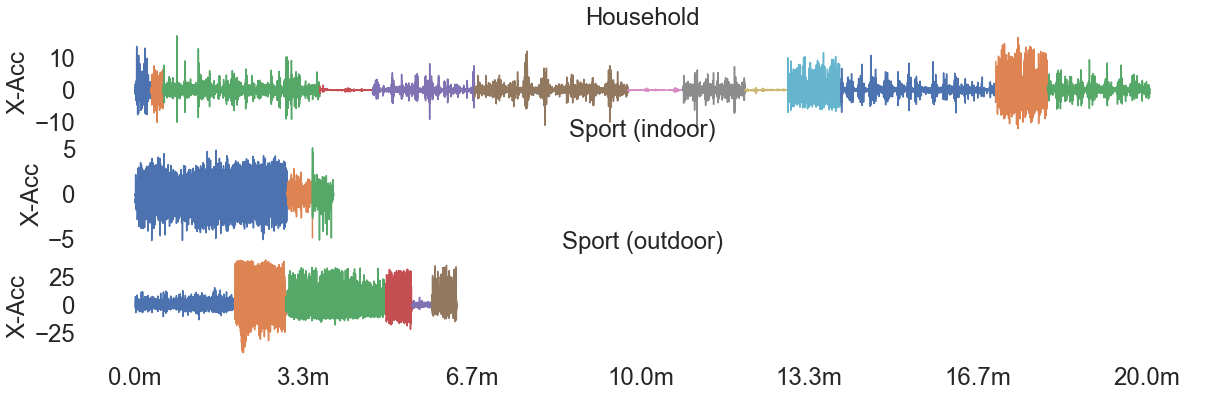

In [101]:
fontsize = 24
selections = [9, 54, 90]
routines = ["Household", "Sport (indoor)", "Sport (outdoor)"]

fig, axes = plt.subplots(len(selections), sharex=True, gridspec_kw={'hspace': .1}, figsize=(20, len(selections)*2))

for idx, ax in zip(selections, axes):
    row = df_ts.iloc[idx,:]
    
    segments = [0] + row.change_points.tolist() + [row.time_series.shape[0]]
    
    for idx in np.arange(0, len(segments)-1):
        ax.plot(np.arange(segments[idx], segments[idx+1]), row.time_series[segments[idx]:segments[idx+1]])
        
    ax.set_title(routines[row.routine-1], fontsize=fontsize)
    ax.set_facecolor('white')
    
    ax.set_ylabel(row.sensor, fontsize=fontsize)
    
    ax.set_xticks(np.arange(0, 60_000+1, 10_000))
    ax.set_xticklabels(labels=[f"{round((x / row.sample_rate) / 60, 1)}m" for x in np.arange(0, 60_000+1, 10_000)])
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/ts_example.pdf", bbox_inches="tight") 

In [112]:
(df_ts.time_series.apply(len).median() / 50) / 60

6.5040000000000004

In [122]:
np.max([np.max(x) for x in alens]) / 50

202.78

In [119]:
(df_ts[df_ts.routine == 3].time_series.apply(len).mean() / 50) / 60

6.4504166666666665